# HOMEWORK 3: Two-Class and Multi-Class Classification

### Importing Libraries 

In [12]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

import autograd.numpy as np
from autograd import grad, value_and_grad

## Exercise 1 – Classifying Breast Cancer 

### Import Data for Feature Vectors and Labels 

In [13]:
# data input
csvname = '/Users/christedmoreno/' + 'breast_cancer_data.csv'
data1 = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data1[:-1,:]
y = data1[-1:,:] 

### 1.1 – Implementing Softmax and Perceptron Cost Functions 

In [14]:
# compute linear combination of input points

def model(x,w):
    ''' 

    Using this function we can compute C linear combinations of input points; one per classifier

    Parameters
    -------------

    x : vector 
    raw input

    w : vector 
    contains bias & feature-touching weights 


    Return
    -------------

    a.T : vector
    column vector containing computed predictive value

    '''
    a = w[0] + np.dot(x.T,w[1:])
    return a.T



# an implementation of the softmax cost

def softmax(w):
    ''' 

    The softmax cost function for logistic regression is equivalent to the cross entropy cost function but instead uses label values of -1 and +1.
    This algorithm allows us to utilize a linear decision boundary (where xw = 0) that separates the data points into two different classes. 
    The decision boundary is learned as a result of a nonlinear regression (tanh nonlinearity) resulting in a learned nonlinear regressor and corresponding linear decision boundary.
    Softmax cost function employs the sigmoid function which allows it to be convex regardless of the dataset used.

    Parameters
    -------------

    w : vector 
    contains bias & feature-touching weights 


    Return
    -------------

    softmax cost : array
    computed softmax cost function for logistic regression 

    '''
    # compute the least squares cost
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost/float(np.size(y))



# an implementation of the perceptron cost

def perceptron(w):
    ''' 

    The perceptron algorithm determins the ideal linear decision boundary directly instead of learning as a result of nonlinear regression.
    The decision boundary cuts the input space into two halves where data can be classified above (xw > 0) or below (xw < 0) the hyperplane.
    Data is classified correctly if the expression max(0, -yxw) returns a positive value.

    Parameters
    -------------

    w : vector 
    contains bias & feature-touching weights 


    Return
    -------------

    perceptron cost : array
    computed perceptron cost function for logistic regression 

    '''
    cost = np.sum(np.maximum(0,-1*y*model(x,w)))
    return cost/float(np.size(y))

### 1.2 – Implementing Gradient Descent for Softmax and Perceptron Functions

In [15]:
def gradient_descent(g,alpha_choice,max_its,w):
    ''' 

    The standard gradient descent algorithm takes the first derivative or gradient of the function.
    Since the negative gradient is always descending, by evaluating this, the algorithm is able to locally find the minimum of a function.

    Parameters
    -------------

    g : callable 
    input function

    alpha_choice : int or str
    steplength parameter/learning rate

    max_its : int
    maximum number of iterations

    w : array 
    initialization


    Return
    -------------

    weight_history : list
    contains all the weights in the algorithm including the initial

    cost_history : list
    contains the evaluated cost function at the kth step including the starting value

    '''
    # compute gradient module using autograd
    gradient = value_and_grad(g)

    weight_history = [w]     # container for weight history
    cost_history = [g(w)]    # container for corresponding cost function history
    
    for k in range(1,max_its+1): # run the gradient descent loop
        
        # check if alpha is diminishing or fixed
        if alpha_choice == "diminishing":
            alpha = 1/float(k)
        else: 
            alpha = alpha_choice
            
        # compute the value of the function and the gradient at wk
        cost_eval,grad_eval = gradient(w) 

        # take gradient descent step
        w = w - alpha*grad_eval

        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
        
    return weight_history,cost_history

In [16]:
# Set the parameters for our softmax algorithm 
g = softmax
alpha_choice = 1; w = 0.1*np.random.randn(9,1); max_its = 1000; 

# Run our softmax algorithm 
weight_history_soft,cost_history_soft = gradient_descent(g,alpha_choice,max_its,w)

# Set the parameters for our perceptron algorithm 
g = perceptron 
alpha_choice = 0.1; w = 0.1*np.random.randn(9,1); max_its = 1000;

# Run our perceptron algorithm
weight_history_perc,cost_history_perc = gradient_descent(g,alpha_choice,max_its,w)

### 1.3 – Tracking the Number of Misclassifications 

In [17]:
### miscounts ###

def miscount(w,x,y):
    ''' 

    This algorithm counts how many misclassifications there are for the softmax and perceptron cost functions after every iteration of gradient descent.
    Misclassified data occurs when the sign of the model (+xw or -xw) is not the same as the sign of its corresponding y label (+1 or -1).

    Parameters
    -------------

    w : vector 
    contains bias & feature-touching weights

    x : array 
    collection of inputs

    y : array
    collection of labels for x inputs


    Return
    -------------

    counter: integer array
    number of misclassifications for a given set of x, w, and y

    '''
    counter = 0
    cost = y[0]*model(x,w) 
    z = np.count_nonzero(cost < 0) # if the sign of the model (xw) and y label are the same then their product must be positive
    counter += z # add to misclassification counter if sign of y and model are opposite 
    return counter 

In [18]:
# Run miscount algorithm on softmax and perceptron cost functions
miscount_history_perc = [miscount(v,x,y) for v in weight_history_perc]
miscount_history_soft = [miscount(v,x,y) for v in weight_history_soft]

### 1.4 – Plotting Cost Function History and Misclassifications History 

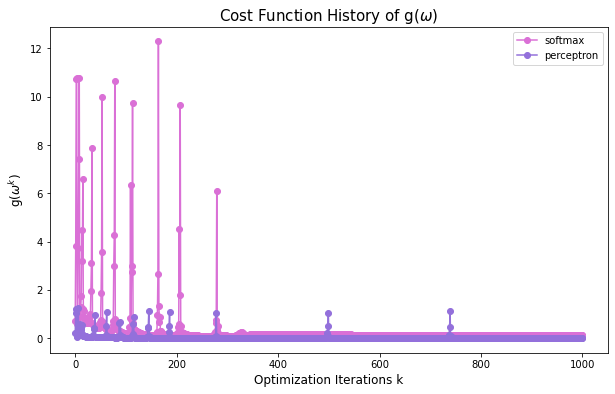

In [19]:
# Cost history plot

# create an array that is a range from 0 to the number of steps taken 
step_numbers_r1 = np.arange(0, len(cost_history_soft)) 
step_numbers_r2 = np.arange(0, len(cost_history_perc))

# set the size and titles of the plot and the axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Cost Function History of g($\omega$)", fontsize = 15) 
ax.set_xlabel('Optimization Iterations k', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax.set_ylabel('g($\omega^k$)', fontsize = 12) # set y-axis title to the value of the cost function at the kth step

# plot the cost history of all runs
plt.plot(step_numbers_r1, cost_history_soft, color = 'orchid', marker = 'o', label = 'softmax')
plt.plot(step_numbers_r2, cost_history_perc, color = 'mediumpurple', marker = 'o', label = 'perceptron')

plt.legend()
plt.show()

#### Observations from the cost function history plot
The softmax cost function starts at a larger g($\omega$) value $\approx$ 14 that quickly minimized and fluctuated greatly between iterations k = 0 and k = 300. The perceptron cost function starts at a lower g($\omega$) with a value that is lower than 2 which is minimized and fluctuates a lot less than softmax. However, the perceptron cost jumps up randomly at k $\approx$ 650 and k $\approx$ 950 whereas the softmax stays minimized after k = 300. Moreover, softmax minimizes at a final value that is greater than the final cost of perceptron (g($\omega_{soft}$) = 0.1229 & g($\omega_{perceptron}$) = 0.0082) indicating that the perceptron cost function was better minimized. 

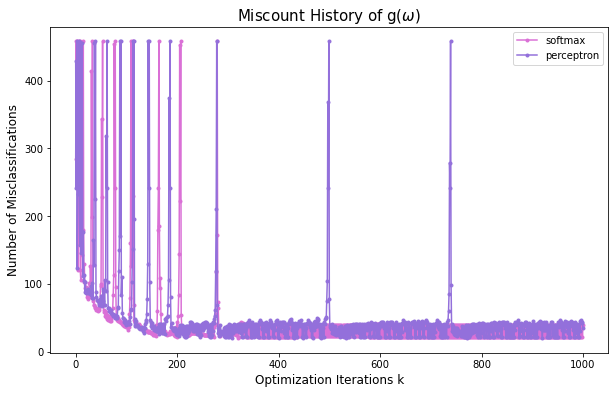

In [20]:
# Miscount history plot for perceptron and softmax

# create an array that is a range from 0 to the number of steps taken 
step_numbers_r1 = np.arange(0, len(cost_history_soft))
step_numbers_r2 = np.arange(0, len(cost_history_perc))

# set the size and titles of the plot and the axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Miscount History of g($\omega$)", fontsize = 15) 
ax.set_xlabel('Optimization Iterations k', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax.set_ylabel('Number of Misclassifications', fontsize = 12) # set y-axis title to the number of misclassifications at the kth step

# plot the cost history of all runs
plt.plot(step_numbers_r1, miscount_history_soft, color = 'orchid', marker = '.', label = 'softmax')
plt.plot(step_numbers_r2, miscount_history_perc, color = 'mediumpurple', marker = '.', label = 'perceptron')

plt.legend()
plt.show()

#### Observations from the miscount history plot 
The softmax and perceptron cost functions start at $\approx$ 450 misclassifications that quickly minimizes and fluctuates greatly within the first 300 iterations. The perceptron cost function fluctuates further after k = 300 whereas the softmax cost function stays at around the same minimized misclassification level. The fluctuations in the miscount history plot align with the fluctuations in the cost history (i.e. the peak in perceptron miscount at k $\approx$ 950 correspond to the peak in perceptron cost at k $\approx$ 950). This observation makes sense as we would expect a deviation from the minimal cost of the functions if there are more misclassified data. Both softmax and perceptron cost functions fluctuate in a small range after k = 300 where there are less than 100 misclassifications and end at around the same minimum number of misclassifications. 

In [21]:
# Determine the minimum number of misclassifications for the cost functions

min_misc_perc = min(miscount_history_perc)
min_misc_soft = min(miscount_history_soft)
print("The minimum number of misclassifications for the softmax cost function is", '\033[1m' + str(min_misc_soft) + '\033[0m')
print("The minimum number of misclassifications for the perceptron cost function is", '\033[1m' + str(min_misc_perc) + '\033[0m')

The minimum number of misclassifications for the softmax cost function is 20
The minimum number of misclassifications for the perceptron cost function is 20


In [22]:
# Modifying miscount to only calculate misclassified malignant cases
def miscount_malignant(w,x,y):
    ''' 

    This algorithm counts how many malignant misclassifications there are for the softmax and perceptron cost functions after every iteration of gradient descent.
    Misclassified data occurs when malignant data with label -1 has a positive sign of the model xw.

    Parameters
    -------------

    w : vector 
    contains bias & feature-touching weights

    x : array 
    collection of inputs

    y : array
    collection of labels for x inputs


    Return
    -------------

    counter: integer array
    number of malignant misclassifications for a given set of x, w, and y

    '''

    counter = 0
    cost = y*model(x,w)
    for i in range(len(cost[0])):
            if y[0][i] == -1: # malignant cases have labels as y = -1 so only looking at those
                if cost[0][i] < 0:
                    counter += 1
    return counter 

In [23]:
# Run our modified miscount algorithm to calculate misclassified malignant cases
miscount_malig_history_perc = [miscount_malignant(v,x,y) for v in weight_history_perc]
miscount_malig_history_soft = [miscount_malignant(v,x,y) for v in weight_history_soft]

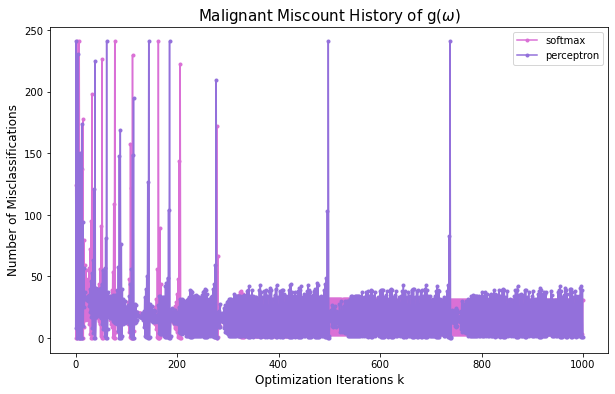

In [24]:
# Miscount history plot for perceptron and softmax

# create an array that is a range from 0 to the number of steps taken 
step_numbers_r1 = np.arange(0, len(cost_history_soft))
step_numbers_r2 = np.arange(0, len(cost_history_perc))

# set the size and titles of the plot and the axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Malignant Miscount History of g($\omega$)", fontsize = 15) 
ax.set_xlabel('Optimization Iterations k', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax.set_ylabel('Number of Misclassifications', fontsize = 12) # set y-axis title to the number of misclassifications at the kth step

# plot the cost history of all runs
plt.plot(step_numbers_r1, miscount_malig_history_soft, color = 'orchid', marker = '.', label = 'softmax')
plt.plot(step_numbers_r2, miscount_malig_history_perc, color = 'mediumpurple', marker = '.', label = 'perceptron')

plt.legend()
plt.show()

#### Observations of the malignant miscount history plot
The softmax and perceptron cost functions start at $\approx$ 250 misclassifications (which is lower than the total miscount history plot which starter at $\approx$ 450) that quickly minimizes and fluctuates greatly within the first 400 iterations. The perceptron cost function fluctuates further after k = 400 whereas the softmax cost function stays at around the same minimized misclassification range. The fluctuations in the malignant miscount history plot also align with the fluctuations in the cost history. This observation makes sense as we would expect a deviation from the minimal cost of the functions if there are more malignant data that are misclassified. Both softmax and perceptron cost functions fluctuate in a small range after k = 700 where there are less than 50 misclassifications and end at around the same minimum number of misclassifications. 

### 1.5 – Cross Entropy Cost

In [25]:
# Create new integer vector yc for logistic regression 
a=np.argwhere(y>0.9)
b=np.argwhere(y<-0.9)
yc=np.arange(699)
yc[a]=1
yc[b]=0

In [26]:
# define sigmoid function

def sigmoid(t):
    ''' 

    This function models the logistic sigmoid function to make minimization of the least squares cost possible in the cross-entropy cost function

    Parameters
    -------------

    t : array 
    initialization

    Return
    -------------

    sigmoid cost: array
    contains values of the sigmoid cost function using corresponding array input data

    '''
    return 1/(1 + np.exp(-t))


# the convex cross-entropy cost function

def cross_entropy(w):
    ''' 

    This cross-entropy algorithm is a two-class classification system which takes in data in the form of P input/output pairs
    Output of our data, y label, takes the values of 0 or +1; when data is classified correctly then the cost function can be minimized optimally
    The implemented log error cost penalizes violations of our classifications more harshly than a squared error does

    Parameters
    -------------

    w : vector 
    contains bias & feature-touching weights


    Return
    -------------

    cross-entropy cost: array
    contains values of cross-entropy cost for a given set of x, w, and y

    '''
    
    # initialize lambda
    lam = 2*10**(-3)
    
    # compute sigmoid of model
    a = sigmoid(model(x,w))

    # compute cost of label 0 points
    ind = np.argwhere(yc == 0)
    cost = -np.sum(np.log(1 - a[:,ind]))

    # add cost on label 1 points
    ind = np.argwhere(yc==1)
    cost -= np.sum(np.log(a[:,ind]))

    # add regularizer
    cost += lam*np.sum(w[1:]**2)

    # compute cross-entropy
    return cost/float(np.size(yc))

In [27]:
# Set the parameters for our perceptron algorithm 
g = cross_entropy  
alpha_choice = 0.6; w = 0.1*np.random.randn(9,1); max_its = 1000;

# Run gradient descent for our logistic regression cost function
weight_history_log,cost_history_log = gradient_descent(g,alpha_choice,max_its,w)

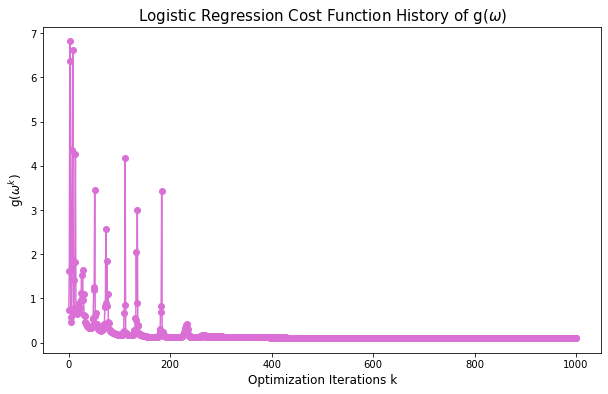

In [28]:
# Logistic regression cost history plot

# create an array that is a range from 0 to the number of steps taken 
step_numbers = np.arange(0, len(cost_history_log)) 

# set the size and titles of the plot and the axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Logistic Regression Cost Function History of g($\omega$)", fontsize = 15) 
ax.set_xlabel('Optimization Iterations k', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax.set_ylabel('g($\omega^k$)', fontsize = 12) # set y-axis title to the value of the cost function at the kth step

# plot the cost history of all runs
plt.plot(step_numbers, cost_history_log, color = 'orchid', marker = 'o')

plt.show()

#### Observations of the logistic regression cost function history plot
The cross entropy cost function starts at a g($\omega$) $\approx$ 8 that quickly minimizes and fluctuates greatly within thw first 200 iterations. There is a smaller spike after k = 200 which then minimizes rapidly back to the minimum. The cross entropy cost function stays minimized at a value close to 0 following the smaller spike and maintains in this minimized value until the last iteration k = 1000. 

#### How will we define a misclassification in this case?
In the case of logistic regression, the new label yc is the same as the old label y except all the -1 values are changed to 0. Thus, we just need to take into account this change in our miscount history as everything else is the same. Therefore, data points are misclassified if xw is positive when their label is 0 and also if xw is negative when their label is +1. 

In [29]:
# Modifying miscount to calculate misclassifications in logistic regression cost function

def miscount_log(w,x,yc):
    ''' 

    This algorithm counts how many misclassifications there are for the logistic regression cost function cost functions after every iteration of gradient descent.
    Misclassified data occurs if xw is positive when their label is 0 and also if xw is negative when their label is +1

    Parameters
    -------------

    w : vector 
    contains bias & feature-touching weights

    x : array 
    collection of inputs

    yc : array
    collection of labels for x inputs


    Return
    -------------

    counter: integer array
    number of misclassifications for a given set of x, w, and y

    '''
    counter = 0
    cost = model(x,w)
    for i in range(len(cost[0])): # y = 0 then model should be neg; if y = 1 then model should be positive
            if yc[i] == 0: 
                if cost[0][i] > 0:
                    counter += 1
            elif yc[i] == 1:
                if cost[0][i] < 0:
                    counter += 1
    return counter 

In [30]:
# Implement our modified miscount algorithm on logistic regression cost history
miscount_history_log = [miscount_log(v,x,yc) for v in weight_history_log]

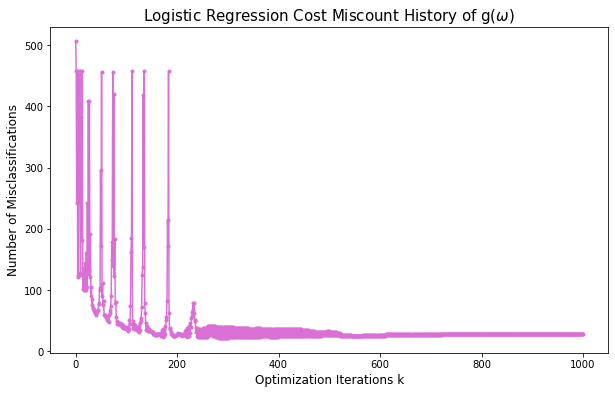

In [31]:
# Miscount history plot for logistic regression cost function

# create an array that is a range from 0 to the number of steps taken 
step_numbers = np.arange(0, len(cost_history_log))

# set the size and titles of the plot and the axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Logistic Regression Cost Miscount History of g($\omega$)", fontsize = 15) 
ax.set_xlabel('Optimization Iterations k', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax.set_ylabel('Number of Misclassifications', fontsize = 12) # set y-axis title to the number of misclassifications at the kth step

# plot the cost history of all runs
plt.plot(step_numbers, miscount_history_log, color = 'orchid', marker = '.')

plt.show()

#### Observations of the logistic regression miscount history plot 
The logistic regression cost function starts with $\approx$ 450 misclassifications that quickly minimizes and fluctuates within the first 200 iterations. There is a large spike in the number of misclassifications after k = 200 and smaller fluctuations between k = 250 and k = 500. After k = 500, the number of misclassifications plateaus at some minimal value until the last iteration. The fluctuations in the miscount history plot also align with the fluctuations in the cost history plot as misclassifications result in deviating from cost minimization. 

## Exercise 2 – Spam Detection

In [32]:
# standard normalization function - with nan checker / filler in-er
def standard_normalizer(x):    
    # compute the mean and standard deviation of the input
    x_means = np.nanmean(x,axis = 1)[:,np.newaxis]
    x_stds = np.nanstd(x,axis = 1)[:,np.newaxis]   

    # check to make sure that x_stds > small threshold, for those not
    # divide by 1 instead of original standard deviation
    ind = np.argwhere(x_stds < 10**(-2))
    if len(ind) > 0:
        ind = [v[0] for v in ind] # Just keep the row index
        adjust = np.zeros((x_stds.shape))
        adjust[ind] = 1.0
        x_stds += adjust

    # fill in any nan values with means 
    ind = np.argwhere(np.isnan(x) == True)
    for i in ind:
        x[i[0],i[1]] = x_means[i[0]]

    # create standard normalizer function
    normalizer = lambda data: (data - x_means)/x_stds

    # create inverse standard normalizer
    inverse_normalizer = lambda data: data*x_stds + x_means

    # return normalizer 
    return normalizer,inverse_normalizer

### Import Data for Feature Vectors and Labels 

In [33]:
# data input
csvname = '/Users/christedmoreno/' + 'spambase_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:-1,:]
y = data[-1:,:] 
normalizer,inverse_normalizer = standard_normalizer(x)
x = normalizer(x)
N = len(x)

### 2.1 – Implementing Gradient Descent in Spam Detection

In [34]:
# Set the parameters for our softmax algorithm 
g = softmax
alpha_choice = 1; w = 0.1*np.random.randn(N+1,1); max_its = 1000; 

# Run our softmax algorithm 
weight_history_soft,cost_history_soft = gradient_descent(g,alpha_choice,max_its,w)

# Set the parameters for our perceptron algorithm 
g = perceptron 
alpha_choice = 0.1; w = 0.1*np.random.randn(N+1,1); max_its = 1000;

# Run our perceptron algorithm
weight_history_perc,cost_history_perc = gradient_descent(g,alpha_choice,max_its,w)

# Count number of miscounts 
miscount_history_perc = [miscount(v,x,y) for v in weight_history_perc]
miscount_history_soft = [miscount(v,x,y) for v in weight_history_soft]

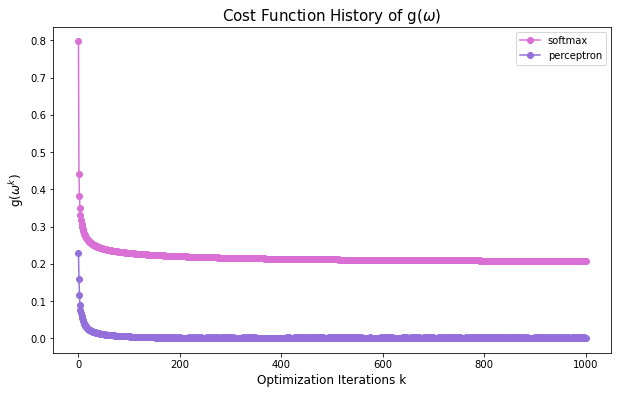

In [35]:
# Cost history plot

# create an array that is a range from 0 to the number of steps taken 
step_numbers_r1 = np.arange(0, len(cost_history_soft)) 
step_numbers_r2 = np.arange(0, len(cost_history_perc))

# set the size and titles of the plot and the axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Cost Function History of g($\omega$)", fontsize = 15) 
ax.set_xlabel('Optimization Iterations k', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax.set_ylabel('g($\omega^k$)', fontsize = 12) # set y-axis title to the value of the cost function at the kth step

# plot the cost history of all runs
plt.plot(step_numbers_r1, cost_history_soft, color = 'orchid', marker = 'o', label = 'softmax')
plt.plot(step_numbers_r2, cost_history_perc, color = 'mediumpurple', marker = 'o', label = 'perceptron')

plt.legend()
plt.show()

#### Observations of the cost function history plot
The softmax cost function starts at a larger g($\omega$) value $\approx$ 0.8 that quickly minimizes to a value that is between 0.2 and 0.3. After k = 200, the softmax cost function slowly minimizes until it plateaus at some minimized value at around k = 650 until the last iteration. On the other hand, the perceptron cost function starts at a lower g($\omega$) at 0.2. After k = 50, the perceptron cost function minimizes slowly until it plateus at some minimized value at around k = 200 until the last iteration. Moreover, softmax minimizes at a final value that is greater than the final cost of perceptron (g($\omega_{soft}$) > 0.2 & g($\omega_{perceptron}$) $\approx$ 0) indicating that the perceptron cost function may have been better minimized. 

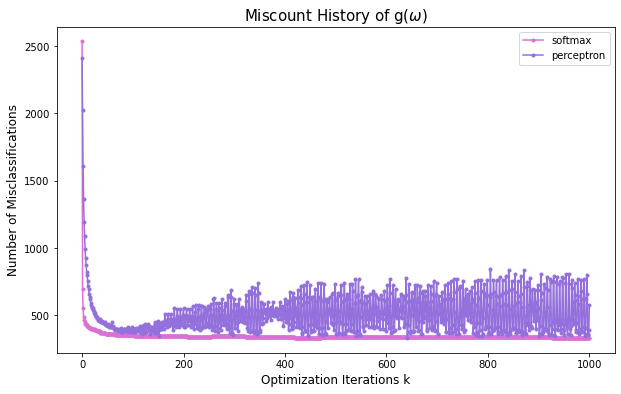

In [36]:
# Miscount history plot for perceptron and softmax

# create an array that is a range from 0 to the number of steps taken 
step_numbers_r1 = np.arange(0, len(cost_history_soft))
step_numbers_r2 = np.arange(0, len(cost_history_perc))

# set the size and titles of the plot and the axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Miscount History of g($\omega$)", fontsize = 15) 
ax.set_xlabel('Optimization Iterations k', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax.set_ylabel('Number of Misclassifications', fontsize = 12) # set y-axis title to the number of misclassifications at the kth step

# plot the cost history of all runs
plt.plot(step_numbers_r1, miscount_history_soft, color = 'orchid', marker = '.', label = 'softmax')
plt.plot(step_numbers_r2, miscount_history_perc, color = 'mediumpurple', marker = '.', label = 'perceptron')

plt.legend()
plt.show()

#### Observations of the miscount history plot
The softmax cost function starts at a larger number of misclassifications with a value close to 2300 misclassification. On the other hand, the perceptron cost function starts a smaller number of misclassifications with a value close to 2100 misclassifications. Both softmax and perceptron number of misclassifications minimize rapidly within the first 200 iterations. After k = 300, the number of perceptron misclassifications greatly fluctuates until the last iteration, whereas the number of softmax misclassifications plateaus at a minimum until the last iteration. When considering the miscount history plot and the cost function history plot, it suggests that the softmax cost function is better minimized despite starting at a larger cost and greater number of misclassifications as the cost has a greater change compared to the perceptron cost (g($\omega_{soft}$): 0.8 --> 0.2; g($\omega_{perceptron}$): < 0.2 --> 0) and the number of softmax mislcassifications stays at a minimum and does not fluctuate unlike the perceptron misclassifications. Lastly, this shows that the softmax cost function is a smooth approximation of the values we are minimizing since the number of misclassifications do not decrease even when the cost function is decreasing. 

### 2.2 – Smallest Number of Misclassifications and Accuracy

In [37]:
min_miss_perc = min(miscount_history_perc)
min_miss_soft = min(miscount_history_soft)
print('The smallest number of misclassifications achieved in the softmax cost function is', '\033[1m' + str(min_miss_soft) + '\033[0m')
print('The smallest number of misclassifications achieved in the perceptron cost function is', '\033[1m' + str(min_miss_perc) + '\033[0m')

The smallest number of misclassifications achieved in the softmax cost function is 332
The smallest number of misclassifications achieved in the perceptron cost function is 335


In [38]:
miscount_acc_perc = 1 - (min_miss_perc/len(x[0]))
miscount_acc_soft = 1 - (min_miss_soft/len(x[0]))
print('The accuracy achieved in the softmax cost function is', '\033[1m' + str(miscount_acc_soft) + '\033[0m')
print('The accuracy achieved in the perceptron cost function is', '\033[1m' + str(miscount_acc_perc) + '\033[0m')

The accuracy achieved in the softmax cost function is 0.927841773527494
The accuracy achieved in the perceptron cost function is 0.9271897413605737


#### Observations on the smallest number of misclassifications and accuracy 
The smallest number of misclassifications is smaller for perceptron than that of softmax, indicating that perceptron was able to achieve more points that are correctly classified compared to softmax. Both cost functions were able to achieve a 93% accuracy where perceptron had a slightly greater accuracy than the softmax. The values indicate that the majority of the points are classified correctly for both softmax and perceptron as both values are close to 1. 

### 2.3 – Constructing the Softmax Confusion Matrix 

In [39]:
# Determining the best w 
best_index = np.argmin(cost_history_soft)
best_w = weight_history_soft[best_index]

# Confusion matrix classifications

def confusion(w, x, y):
    ''' 

    This algorithm builds on classifying data correctly and incorrectly by separating the data into four groups
    These four groups include: (A) +1 labelled data correctly classified, (B) +1 labelled data incorrectly labelled, (C) -1 labelled data incorrectly labelled, and (D) -1 labelled data correctly labelled 

    Parameters
    -------------

    w : vector 
    contains bias & feature-touching weights

    x : array 
    collection of inputs

    y : array
    collection of labels for x inputs


    Return
    -------------

    count A-->D: integer
    number of data points classified into either A,B,C, or D groups

    '''
    y = y.flatten()
    y_hat = (np.sign(model(x,w))).flatten()
    y_neg = np.argwhere(y == -1) # find indices where data are labelled as -1
    y_pos = np.argwhere(y == 1) # find indices where data are labelled as +1
    
    # A values
    count_A = 0 
    count_A += np.sum(y_hat[y_pos] == y[y_pos]) # data points with actual +1 labels correctly labelled
    
    # B values
    count_B = 0
    count_B += np.sum(y_hat[y_pos] != y[y_pos]) # data points with actual +1 labels incorrectly labelled
    
    # C values
    count_C = 0
    count_C += np.sum(y_hat[y_neg] != y[y_neg]) # data points with actual -1 labels incorrectly labelled
    
    # D values
    count_D = 0
    count_D += np.sum(y_hat[y_neg] == y[y_neg]) # data points with actual -1 labels correctly labelled
    
    return count_A, count_B, count_C, count_D
    

In [40]:
# Obtain our softmax confusion matrix 
A, B, C, D = confusion(best_w, x, y)
data = {'spam (+1)': [A, C], 'ham (-1)': [B, D]}
confusion_matrix = pd.DataFrame(data)
confusion_matrix.index = ['spam (+1)','ham (-1)']
confusion_matrix.columns = pd.MultiIndex.from_product([["predicted"], confusion_matrix.columns])
confusion_matrix.index = pd.MultiIndex.from_product([["actual"], confusion_matrix.index])
display(confusion_matrix)
print('\033[1m' + 'The table above displays the confusion matrix using the best w' + '\033[0m' '\n')


predicted         
                 spam (+1) ham (-1)
actual spam (+1)      1607      206
       ham (-1)        126     2662

The table above displays the confusion matrix using the best w



#### Observations on the best w and confusion matrix
The best w was chosen as the index in weight history that corresponded to the index of the lowest cost in cost history. The confusion matrix demonstrates that the majority of spam messages were correctly classified as spam and the majority of ham messages were correctly classified as ham. There were a greater proportion of misclassified spam messages (205/1813 = 11.3%) than misclassified ham messages (126/2788 = 4.5%) after implementing the classification algorithm. 

## Exercise 3 – Credit Check

### Import Data for Feature Vectors and Labels 

In [41]:
# load in dataset
csvname = '/Users/christedmoreno/' + 'credit_dataset.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]
N = len(x)

### 3.1 – Standard Normalization of the Input Data

In [42]:
normalizer,inverse_normalizer = standard_normalizer(x)
x = normalizer(x)

### 3.2 – Implementing Gradient Descent in Credit Check

In [43]:
# Set the parameters for our softmax algorithm 
g = perceptron
alpha_choice = 0.1; w = 0.1*np.random.randn(N+1,1); max_its = 1000; 

# Run our softmax algorithm 
weight_history_perc,cost_history_perc = gradient_descent(g,alpha_choice,max_its,w)


# Count number of miscounts 
miscount_history_perc = [miscount(v,x,y) for v in weight_history_perc]

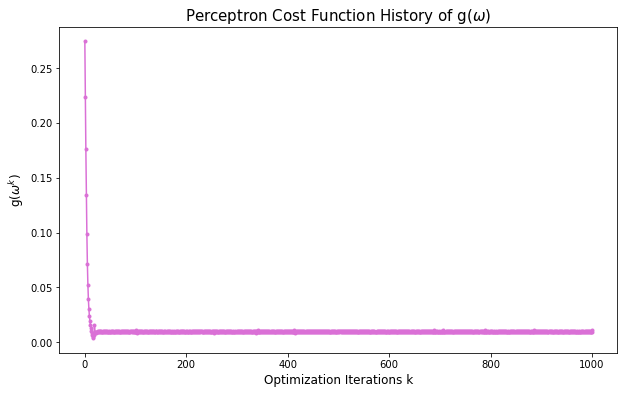

In [44]:
# Perceptron Cost history plot

# create an array that is a range from 0 to the number of steps taken 
step_numbers = np.arange(0, len(cost_history_perc)) 

# set the size and titles of the plot and the axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Perceptron Cost Function History of g($\omega$)", fontsize = 15) 
ax.set_xlabel('Optimization Iterations k', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax.set_ylabel('g($\omega^k$)', fontsize = 12) # set y-axis title to the value of the cost function at the kth step

# plot the cost history of all runs
plt.plot(step_numbers, cost_history_perc, color = 'orchid', marker = '.')

plt.show()

#### Observations of the perceptron cost function history plot
The perceptron cost function starts at g($\omega$) $\approx$ 0.2 that quickly minimizes to a global minimum value. After, the cost function spikes up and then falls down to a minimum until the last iteration. Between k = 50 and k = 1000 the cost fluctuates slightly around a range of costs.  

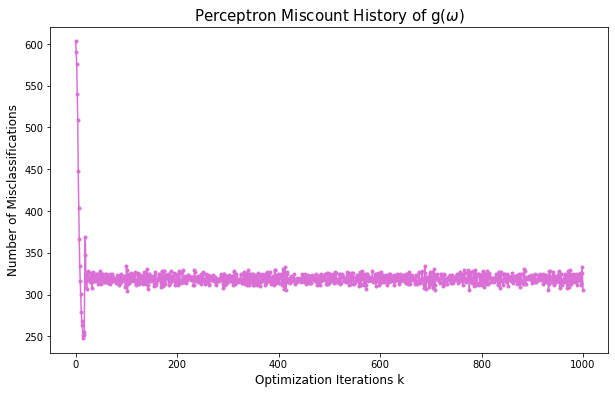

In [45]:
# Perceptron Miscount history plot for perceptron and softmax

# create an array that is a range from 0 to the number of steps taken 
step_numbers = np.arange(0, len(cost_history_perc))

# set the size and titles of the plot and the axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Perceptron Miscount History of g($\omega$)", fontsize = 15) 
ax.set_xlabel('Optimization Iterations k', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax.set_ylabel('Number of Misclassifications', fontsize = 12) # set y-axis title to the number of misclassifications at the kth step

# plot the cost history of all runs
plt.plot(step_numbers, miscount_history_perc, color = 'orchid', marker = '.')

plt.show()

#### Observations of the perceptron miscount history plot 
The perceptron miscount plot starts at $\approx$ 425 misclassified data that quickly minizes to the global minimum which was less than 250 misclassifications. Misclassifications then spike and fall down to range of misclassification values that plateaus until the final iteration. 

In [46]:
# Determining the accuracy 
min_miss_perc = min(miscount_history_perc)
miscount_acc_perc = 1 - (min_miss_perc/len(x[0]))
print('The accuracy achieved in the perceptron cost function is', '\033[1m' + str(miscount_acc_perc) + '\033[0m')

The accuracy achieved in the perceptron cost function is 0.752


#### Can we achieve 75% accuracy?
Yes, it is possible to reach 75% accuracy depending on the starting w. Sometimes we get accuracy values under 75%, at 75%, or over 75% depending on our randomly generated starting weight. 

### 3.3 – Constructing the Perceptron Confusion Matrix 

In [47]:
# Determining the best w 
best_index = np.argmin(cost_history_perc)
best_w = weight_history_perc[best_index]

# Obtaining our confusion matrix 
A, B, C, D = confusion(best_w, x, y)
data = {'good (+1)': [A, C], 'bad (-1)': [B, D]}
confusion_matrix = pd.DataFrame(data)
confusion_matrix.index = ['good (+1)','bad (-1)']
confusion_matrix.columns = pd.MultiIndex.from_product([["predicted"], confusion_matrix.columns])
confusion_matrix.index = pd.MultiIndex.from_product([["actual"], confusion_matrix.index])
display(confusion_matrix)
print('\033[1m' + 'The table above is the confusion matrix using the best w' + '\033[0m' '\n') 

predicted         
                 good (+1) bad (-1)
actual good (+1)       632       68
       bad (-1)        187      113

The table above is the confusion matrix using the best w



#### Observations of the confusion matrix 
The confusion matrix demonstrates that the majority of the good ratings were correctly classified as good and the majority of the bad ratings were correctly classified as bad. There were a greater proportion of misclassified bad ratings (105/300 = 35.0%) than misclassified good ratings (149/700 = 21.3%) after implementing the classification algorithm. 

## Exercise 4 – 3-Class Classification

### Implementing the L2 regularized multi-class perceptron 

In [48]:
# compute C linear combinations of input point, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

lam = 10**-5  # our regularization paramter 


def multiclass_perceptron(w):
    ''' 

    The multi-class perceptron algorithm determines the ideal linear decision boundaries that separate the datapoints into multiple classes. 
    Instead of training two classifiers first and then fusing them into a single decision boundary, multi-class perceptron trains all classifiers simultaneously to satisfy the fusion rule.

    Parameters
    -------------

    w : vector 
    contains bias & feature-touching weights 


    Return
    -------------

    multi-class perceptron cost : array
    computed multi-class perceptron cost function for logistic regression 

    '''
    # pre-compute predictions on all points
    all_evals = model(x,w)
    
    # compute maximum across data points
    a = np.max(all_evals,axis = 0)    

    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost = np.sum(a - b)
    
    # add regularizer
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    
    # return average
    return cost/float(np.size(y))

### Import Data for Feature Vectors and Labels 

In [49]:
# load in dataset
data = np.loadtxt('/Users/christedmoreno/' + '3class_data.csv',delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:]


### 4.1 – Implementing Gradient Descent on the Multi-class Perceptron Cost Function

In [50]:
# Set the parameters for our multi-class perceptron algorithm 
g = multiclass_perceptron
alpha_choice = 0.1; w = 0.1*np.random.randn(3,3); max_its = 1000; 

# Run our multi-class perceptron algorithm 
weight_history_multi,cost_history_multi = gradient_descent(g,alpha_choice,max_its,w)

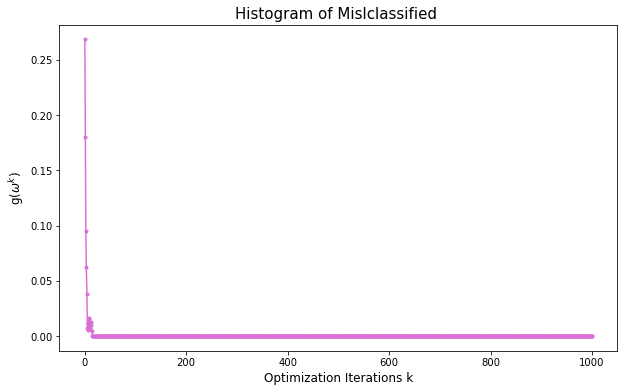

In [51]:
# Cost history plot

# create an array that is a range from 0 to the number of steps taken 
step_numbers_multi = np.arange(0, len(cost_history_multi)) 

# set the size and titles of the plot and the axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Histogram of Mislclassified ", fontsize = 15) 
ax.set_xlabel('Optimization Iterations k', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax.set_ylabel('g($\omega^k$)', fontsize = 12) # set y-axis title to the value of the cost function at the kth step

# plot the cost history of all runs
plt.plot(step_numbers_multi, cost_history_multi, color = 'orchid', marker = '.')

plt.show()

#### Observations of the multi-class perceptron cost history plot
The multi-class perceptron cost function starts at g($\omega$) $\approx$ 0.07 that quickly minimizes to a minimum value close to 0 until the last iteration. The overall shape of the plot is not a gradual minimization but rather a rapid minimization that stays at the same cost thus producing an L-shaped plot.

In [52]:
def miscount_multi(w, x, y):
    ''' 

    This algorithm counts how many misclassifications there are within the three different classes 
    The misclassifications is based on whether the set of classifications using fusion rule matches the given y label values of 0, +1, or +2

    Parameters
    -------------

    w : vector 
    contains bias & feature-touching weights

    x : array 
    collection of inputs

    yc : array
    collection of labels for x inputs


    Return
    -------------

    counter: integer array
    number of misclassifications for a given set of x, w, and y

    '''
    counter = 0
    y_hat = []
    for i in range(0, len(y[0])): 
        y_hat += [np.argmax(model(x,w)[:,i])] # generate list of array of indices indicating whether each point is in class 0, 1, or 2 
    counter += np.sum(y_hat != y) # counts number of misclassifications if array of indices does not match with classifications in label y
    return counter

In [53]:
# implement our miscount algorithm on the multi-class perceptron cost function
miscount_history_multi = [miscount_multi(v,x,y) for v in weight_history_multi]

In [54]:
# Determining the accuracy 
min_miss_multi = min(miscount_history_multi)
miscount_acc_multi = 1 - (min_miss_multi/len(y[0]))
print('The accuracy achieved in the multi-class perceptron cost function is', '\033[1m' + str(miscount_acc_multi) + '\033[0m')

The accuracy achieved in the multi-class perceptron cost function is 1.0


#### Can you achieve a good classification?
Yes, we are able to achieve a good classification based on the accuracy calculation. We were able to get a 1 on the accuracy scale, which is the most optimal level of accuracy, therefore we can achieve a good classification!

### 4.2 – Plotting the Data with Decision Boundaries 

#### How do we create decision boundaries for our classified points?
The decision boundary is a line that satisfies the equation xw = 0. To create these lines we must solve this equation, which results in x1w1 + x2w2 + w0 = 0. Solving for x2 we get: x2 = -(x1w1 + w0)/w2 which we plot for x2 while x1 takes values from 0 --> 1. Based on the solved equation, each class has a linear decision boundary with a y-intercept of -w0/w2 and a slope of -w1/w2. 

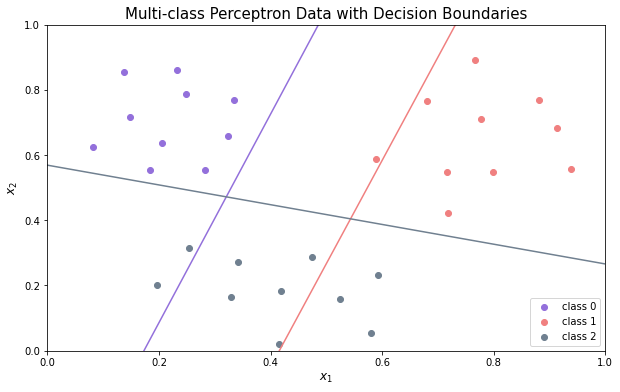

In [288]:
# Data with decision boundaries plot

# generate classify points into 3 different classes
y_hat = []
best_w = weight_history_multi[-1]
for i in range(0, len(y[0])): 
    y_hat += [np.argmax(model(x,best_w)[:,i])]
y_hat = np.array(y_hat)
c1 = np.argwhere(y_hat == 0) # find indices where datapoints are labelled in class 0
c2 = np.argwhere(y_hat == 1) # find indices where datapoints are labelled in class 1
c3 = np.argwhere(y_hat == 2) # find indices where datapoints are labelled in class 2

# creat decision boundary lines by solving the equation xw = 0 for each respective w class; w rows indicate w0,w1,w2 whereas w columns separate into class 0, 1, 2 
ran = np.linspace(0,1)
num1 = (-1*((best_w[0][0]) + ran*best_w[1][0]))/best_w[2][0] # class 0
num2 = (-1*((best_w[0][1]) + ran*best_w[1][1]))/best_w[2][1] # class 1
num3 = (-1*(best_w[0][2] + ran*best_w[1][2]))/best_w[2][2] # class 2

# create an array that is a range from 0 to the number of steps taken 
step_numbers_multi = np.arange(0, len(cost_history_multi)) 

# set the size and titles of the plot and the axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Multi-class Perceptron Data with Decision Boundaries", fontsize = 15) 
ax.set_xlabel('$x_1$', fontsize = 12) # set x-axis title to the kth step in the algorithm
ax.set_ylabel('$x_2$', fontsize = 12) # set y-axis title to the value of the cost function at the kth step

# classification 0
plt.scatter((x[0,c1]), (x[1,c1]), color = 'mediumpurple', marker = 'o', label = 'class 0')
plt.plot(ran, num1, color = 'mediumpurple')

# classification 1 
plt.scatter((x[0,c2]), (x[1,c2]), color = 'lightcoral', marker = 'o', label = 'class 1')
plt.plot(ran, num2, color = 'lightcoral')

# classification 2
plt.scatter((x[0,c3]), (x[1,c3]), color = 'slategrey', marker = 'o', label = 'class 2')
plt.plot(ran, num3, color = 'slategrey')

plt.axis([0,1,0,1])
plt.legend(loc = 'lower right')
plt.show()

#### Observations of the data with decision boundaries 
The decision boundaries vary when the algorithm is ran because of the randomized starting w vector. When run enough times the lines will be able to separate the three different classes that are labelled by the three different colours of the plot. Sometimes the decision boundaries run across the classified data points and at other times the decision boundaries may not show up as the axis is limited to 0-1 for x1 and x2.